# Dataset 2

In [2]:
import numpy as np
import pandas as pd
import re
import itertools
import nltk
import seaborn as sb
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC
from sklearn import svm
from sklearn import tree
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, recall_score

## Exploring the Dataset

In [3]:
# loading the dataset to a pandas dataframe
news_dataset = pd.read_csv('Documents/COLLEGE/THESIS/DATASET/dataset1.csv')

In [4]:
# number of (rows, columns) = (news articles, features)
news_dataset.shape

(4594, 4)

In [5]:
# print the first 5 rows of the dataframe
news_dataset.head()

,idd,title,text,label
0,Fq+C96tcx+,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,REAL
1,bHUqK!pgmv,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
2,4Y4Ubf%aTi,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
3,_CoY89SJ@K,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,REAL
4,+rJHoRQVLe,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL


## Initializing Dataset

In [6]:
# replacing values in the 'label' column
news_dataset['label'] = news_dataset['label'].replace({'REAL': 0, 'FAKE': 1})

In [7]:
#removing the 'idd' column
news_dataset.drop('idd', axis=1, inplace=True)

In [8]:
news_dataset.head()

,title,text,label
0,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,0
1,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,0
2,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",0
3,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,0
4,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,0


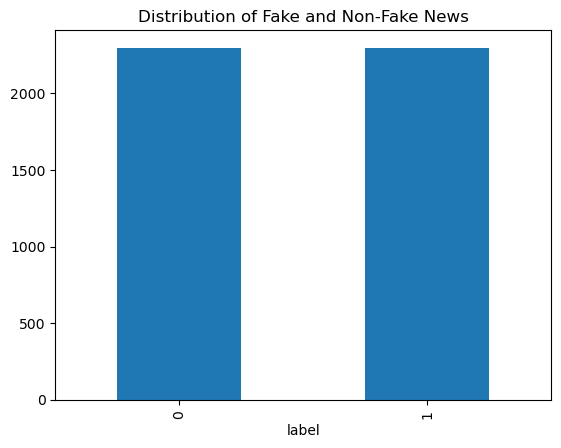

In [9]:
news_dataset['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Fake and Non-Fake News')
plt.show()

## Data Cleaning

### <font color=orange> Handling Missing Values

In [10]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

title    1
text     0
label    0
dtype: int64

In [11]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

### <font color=orange>Removing Duplicate Entries

In [12]:
#checking for duplicated values
news_dataset.duplicated(['title', 'text'])

0       False
1       False
2       False
3       False
4       False
        ...  
4589    False
4590    False
4591    False
4592    False
4593    False
Length: 4594, dtype: bool

### <font color=orange> Merging Columns

In [13]:
# merging the author name and news title
news_dataset['content'] = news_dataset['text']+' '+news_dataset['title']

In [14]:
# Drop 'text' and 'title' columns
news_dataset.drop(columns=['text', 'title'], inplace=True)

In [15]:
news_dataset.head()

,label,content
0,0,UPDATE: Gov. Fallin vetoed the bill on Friday....
1,0,Ever since Texas laws closed about half of the...
2,0,"Donald Trump and Hillary Clinton, now at the s..."
3,0,A Houston grand jury investigating criminal al...
4,0,WASHINGTON -- Forty-three years after the Supr...


### <font color=skyblue> Word Cloud

In [16]:
# Function to generate wordclouds (unchanged)
def generate_wordcloud(data, label, title):
    text = " ".join(text for text in data[data['label'] == label]['content'])
    wordcloud = WordCloud(background_color='white',
                          stopwords=STOPWORDS,
                          width=800, height=400).generate(text)

    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

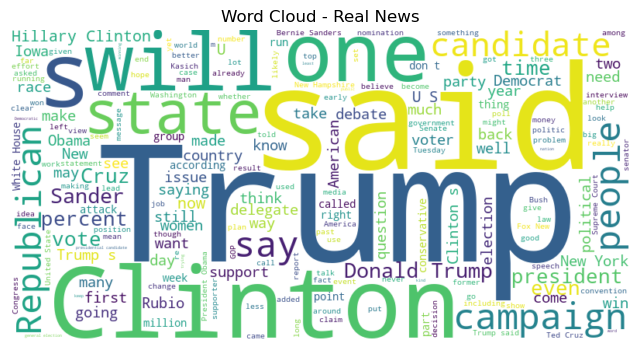

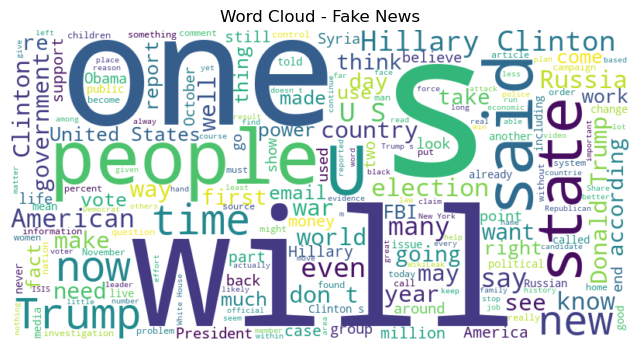

In [17]:
# Generate word clouds for each label
generate_wordcloud(news_dataset, 0, "Word Cloud - Real News")
generate_wordcloud(news_dataset, 1, "Word Cloud - Fake News")

## Text Normalization

### <font color=orange> Separating Columns

In [18]:
# separating the content & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [19]:
print(X)
print(Y)

                                                content
0     UPDATE: Gov. Fallin vetoed the bill on Friday....
1     Ever since Texas laws closed about half of the...
2     Donald Trump and Hillary Clinton, now at the s...
3     A Houston grand jury investigating criminal al...
4     WASHINGTON -- Forty-three years after the Supr...
...                                                 ...
4589  License DMCA \nCold War 2.0 has reached unprec...
4590  Print \nSen. Bernie Sanders laid out the ways ...
4591  As the pressure to start construction on the D...
4592  Tweet Home » Gold » Gold News » Currency Crisi...
4593  Written by Eric Margolis   As a former soldier...

[4594 rows x 1 columns]
0       0
1       0
2       0
3       0
4       0
       ..
4589    1
4590    1
4591    1
4592    1
4593    1
Name: label, Length: 4594, dtype: int64


### <font color=orange> Data Preprocessing

In [22]:
def filtering(content):  
    filtered_content = re.sub('[^a-zA-Z]', ' ', content)  # Remove non-alphabetic characters
    filtered_content = filtered_content.lower()  # Lowercase
    filtered_content = filtered_content.split()  # Tokenize
    filtered_content = [word for word in filtered_content if not word in stopwords.words('English')]  # Remove English stopwords
    filtered_content = ' '.join(filtered_content)  # Join back into a string
    return filtered_content

In [23]:
news_dataset['content'] = news_dataset['content'].apply(filtering) #filtering

In [24]:
print(news_dataset['content'])

0       update gov fallin vetoed bill friday head lawm...
1       ever since texas laws closed half state aborti...
2       donald trump hillary clinton starting line gen...
3       houston grand jury investigating criminal alle...
4       washington forty three years supreme court est...
                              ...                        
4589    license dmca cold war reached unprecedented hy...
4590    print sen bernie sanders laid ways would lever...
4591    pressure start construction dakota access pipe...
4592    tweet home gold gold news currency crisis alas...
4593    written eric margolis former soldier war corre...
Name: content, Length: 4594, dtype: object


## Separating the data and label

In [25]:
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [26]:
print(X)

['update gov fallin vetoed bill friday head lawmakers oklahoma approved bill thursday would make performing abortions felony revoke medical licenses physicians assist procedures sweeping measure opponents described unconstitutional unprecedented heads gov mary fallin r five days including sunday decide whether sign bill veto allow become law without signature according spokesman governor withhold comment bill bills staff chance review michael mcnutt spokesman fallin said email oklahoma bill first measure kind according center reproductive rights says states seeking ban abortion simply banned procedure rather attaching penalties like according measure known sb person performs induces abortion guilty felony punished one three years state penitentiary legislation also says physician participates abortion deemed unprofessional conduct bill prohibited obtaining renewing license practice medicine state however medical licenses stripped doctors perform abortions deemed necessary save mother l

In [27]:
print(Y)

[0 0 0 ... 1 1 1]


In [28]:
Y.shape

(4594,)

<Axes: xlabel='label', ylabel='count'>

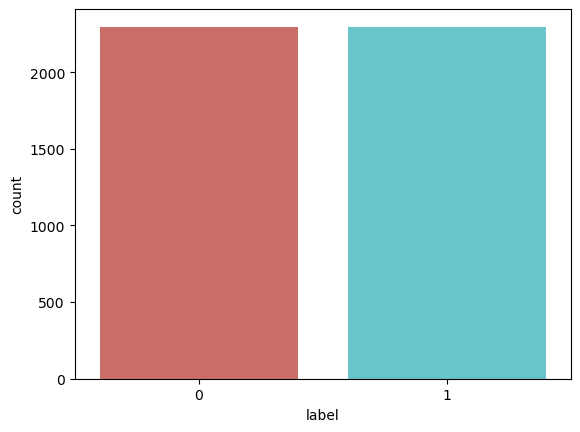

In [29]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(news_dataset)

### <font color=orange> TF-IDF Vectorizer

In [30]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [31]:
print(X)

  (0, 54913)	0.01681299606711468
  (0, 54878)	0.009674008510364863
  (0, 54869)	0.009676865238066767
  (0, 54622)	0.028968061638995967
  (0, 54512)	0.044389843551269494
  (0, 54357)	0.03963216247026265
  (0, 54350)	0.015250413449998668
  (0, 54270)	0.012349875519240473
  (0, 54265)	0.03119648409048206
  (0, 53955)	0.014952885191765013
  (0, 53823)	0.011722606701741068
  (0, 53610)	0.01096184670790137
  (0, 53406)	0.025056300566605887
  (0, 53188)	0.03259071753511768
  (0, 53135)	0.15156436947700982
  (0, 53075)	0.02143138070744723
  (0, 53057)	0.016964855124997333
  (0, 53056)	0.03431717673930967
  (0, 52987)	0.026565656725969604
  (0, 52746)	0.01559640066883424
  (0, 52689)	0.016064134803033453
  (0, 52649)	0.033284246959662686
  (0, 52648)	0.08464507434720582
  (0, 52078)	0.04595757496571723
  (0, 51975)	0.02460059505375868
  :	:
  (4593, 3203)	0.05878125688180159
  (4593, 3025)	0.021914200165644066
  (4593, 3021)	0.02931008210098939
  (4593, 3020)	0.02141488876252045
  (4593, 2650)	

### Spliiting the Dataset

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

### <font color=pink> Create Scores Function </font>

In [35]:
def scores(model, X_train, Y_train, X_test, Y_test):
    # Training Set Metrics
    X_train_prediction = model.predict(X_train)
    cm_train = metrics.confusion_matrix(Y_train, X_train_prediction)
    recall_train = metrics.recall_score(Y_train, X_train_prediction)
    f1_train = metrics.f1_score(Y_train, X_train_prediction)
    accuracy_train = metrics.accuracy_score(Y_train, X_train_prediction)   

    # Testing Set Metrics
    X_test_prediction = model.predict(X_test)
    cm_test = metrics.confusion_matrix(Y_test, X_test_prediction)
    recall_test = metrics.recall_score(Y_test, X_test_prediction)
    f1_test = metrics.f1_score(Y_test, X_test_prediction)
    accuracy_test = metrics.accuracy_score(Y_test, X_test_prediction)  

    # Return results in a dictionary
    return {
        'Training Set': {
            'Accuracy': accuracy_train, 
            'Confusion Matrix': cm_train,
            'Recall': recall_train,
            'F1-Score': f1_train,
        },
        'Testing Set': {
            'Accuracy': accuracy_test,  
            'Confusion Matrix': cm_test,
            'Recall': recall_test,
            'F1-Score': f1_test,
        }
    }
def print_scores_table(scores_dict):
    print('Evaluation Metrics:')
    for dataset, metrics in scores_dict.items():
        print(f"\n{dataset}:")
        print("Accuracy:", metrics['Accuracy']) 
        print("Confusion Matrix:\n", metrics['Confusion Matrix'])
        print("Recall:", metrics['Recall'])
        print("F1-Score:", metrics['F1-Score'])

### <font color=pink> Confusion Matrix Plot Function </font>

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Training the model

## <font color=violet> Logistic Regression</font>

In [37]:
LR_model = LogisticRegression()

In [38]:
LR_model = LR_model.fit(X_train, Y_train) 

### <font color=purple> Performance Evaluation</font>

In [39]:
LR_evaluation_scores = scores(LR_model, X_train, Y_train, X_test, Y_test)
print_scores_table(LR_evaluation_scores)

Evaluation Metrics:

Training Set:
Accuracy: 0.9523809523809523
Confusion Matrix:
 [[1718  119]
 [  56 1782]]
Recall: 0.969532100108814
F1-Score: 0.9531960417223857

Testing Set:
Accuracy: 0.9140369967355821
Confusion Matrix:
 [[406  54]
 [ 25 434]]
Recall: 0.9455337690631809
F1-Score: 0.9165786694825766


Accuracy: 91.4%
Confusion matrix, without normalization


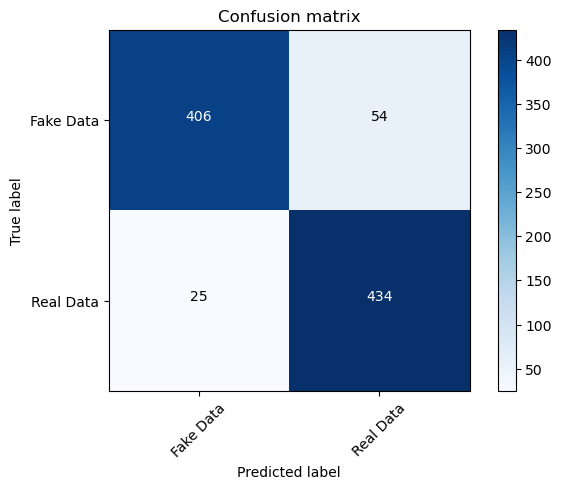

In [40]:
#accuracy score on the test data
Y_pred = LR_model.predict(X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'])

### <font color=green> Making a Predictive Model</font>

In [41]:
X_new_LR = X_test[2]

prediction_LR = LR_model.predict(X_new_LR)
print(prediction_LR)

if (prediction_LR[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


### <font color=violet> K-Nearest Neighbors Classifier</font>

In [42]:
KNN_model = KNeighborsClassifier()

In [43]:
KNN_model = KNN_model.fit(X_train, Y_train) 

### <font color=purple> Performance Evaluation</font>

In [44]:
KNN_evaluation_scores = scores(KNN_model, X_train, Y_train, X_test, Y_test)
print_scores_table(KNN_evaluation_scores)

Evaluation Metrics:

Training Set:
Accuracy: 0.8963265306122449
Confusion Matrix:
 [[1787   50]
 [ 331 1507]]
Recall: 0.8199129488574538
F1-Score: 0.8877761413843888

Testing Set:
Accuracy: 0.8607181719260065
Confusion Matrix:
 [[438  22]
 [106 353]]
Recall: 0.7690631808278867
F1-Score: 0.8465227817745803


Accuracy: 86.07%
Confusion matrix, without normalization


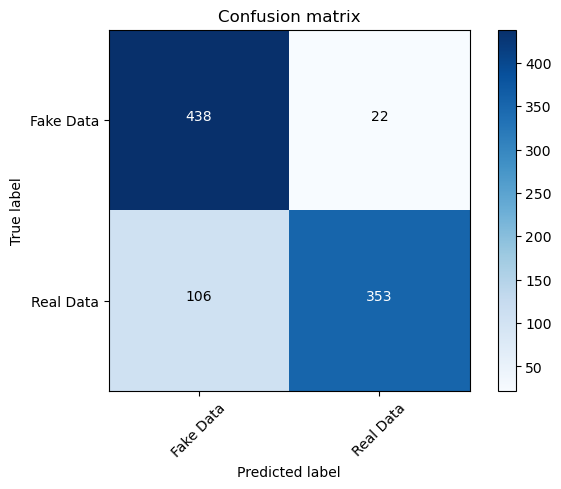

In [45]:
#accuracy score on the test data
Y_pred = KNN_model.predict(X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'])

### <font color=green> Making a Predictive Model</font>

In [46]:
X_new_KNN = X_test[3]

prediction_KNN = KNN_model.predict(X_new_KNN)
print(prediction_KNN)

if (prediction_KNN[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


### <font color=violet> Support Vector Machine </font>

In [48]:
# Lowering C for regularization
SVM_model = svm.SVC(probability=True, C=0.1, kernel='linear')  

In [49]:
SVM_model = SVM_model.fit(X_train, Y_train) 

### <font color=purple> Performance Evaluation</font>

In [50]:
SVM_evaluation_scores = scores(SVM_model, X_train, Y_train, X_test, Y_test)
print_scores_table(SVM_evaluation_scores)

Evaluation Metrics:

Training Set:
Accuracy: 0.90421768707483
Confusion Matrix:
 [[1569  268]
 [  84 1754]]
Recall: 0.9542981501632208
F1-Score: 0.9088082901554404

Testing Set:
Accuracy: 0.8813928182807399
Confusion Matrix:
 [[378  82]
 [ 27 432]]
Recall: 0.9411764705882353
F1-Score: 0.8879753340184995


Accuracy: 88.14%
Confusion matrix, without normalization


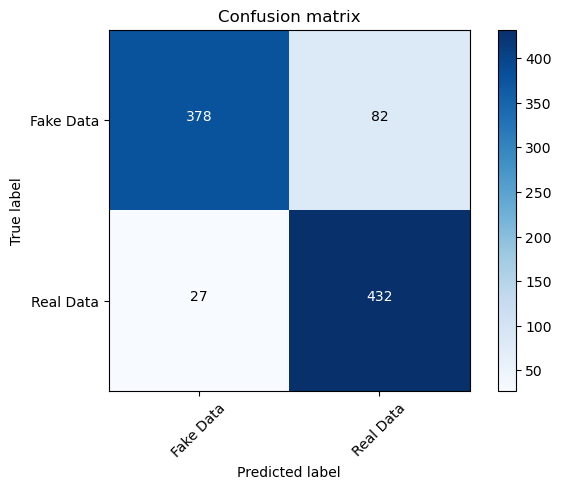

In [51]:
#accuracy score on the test data
Y_pred = SVM_model.predict(X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'])

### <font color=green> Making a Predictive Model</font>

In [52]:
X_new_SVM = X_test[2]

prediction_SVM = SVM_model.predict(X_new_SVM)
print(prediction_SVM)

if (prediction_SVM[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


### <font color=violet> Decision Tree</font>

In [53]:
# applying Pre-Pruning techniques to control tree complexity during the growth phase
DT_model = tree.DecisionTreeClassifier(           
      max_depth=3,          # limiting the depth of the tree
      min_samples_split=5,  # minimum samples to create a split
      min_samples_leaf=2    # minimum samples in a leaf node 
)

In [54]:
DT_model = DT_model.fit(X_train, Y_train) 

### <font color=purple> Performance Evaluation</font>

In [55]:
DT_evaluation_scores = scores(DT_model, X_train, Y_train, X_test, Y_test)
print_scores_table(DT_evaluation_scores)

Evaluation Metrics:

Training Set:
Accuracy: 0.820952380952381
Confusion Matrix:
 [[1503  334]
 [ 324 1514]]
Recall: 0.823721436343852
F1-Score: 0.8214867064568638

Testing Set:
Accuracy: 0.8117519042437432
Confusion Matrix:
 [[369  91]
 [ 82 377]]
Recall: 0.8213507625272332
F1-Score: 0.813376483279396


Accuracy: 81.18%
Confusion matrix, without normalization


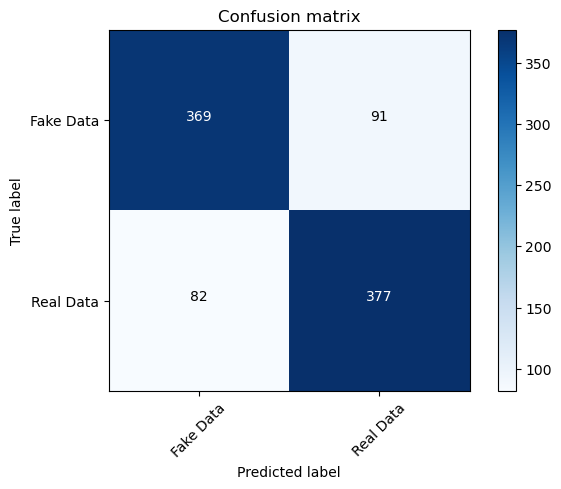

In [56]:
#accuracy score on the test data
Y_pred = DT_model.predict(X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'])

### <font color=green> Making a Predictive Model</font>

In [57]:
X_new_DT = X_test[3]
prediction_DT = DT_model.predict(X_new_DT)
print(prediction_DT)

if (prediction_DT[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


### <font color=violet> Multinomial Naive Bayes</font>

In [58]:
MNB_model = MultinomialNB() 

In [59]:
MNB_model = MNB_model.fit(X_train, Y_train) 

### <font color=purple> Performance Evaluation</font>

In [60]:
MNB_evaluation_scores = scores(MNB_model, X_train, Y_train, X_test, Y_test)
print_scores_table(MNB_evaluation_scores)

Evaluation Metrics:

Training Set:
Accuracy: 0.8870748299319728
Confusion Matrix:
 [[1818   19]
 [ 396 1442]]
Recall: 0.7845484221980413
F1-Score: 0.8742043043346469

Testing Set:
Accuracy: 0.8258977149075082
Confusion Matrix:
 [[453   7]
 [153 306]]
Recall: 0.6666666666666666
F1-Score: 0.7927461139896373


Accuracy: 82.59%
Confusion matrix, without normalization


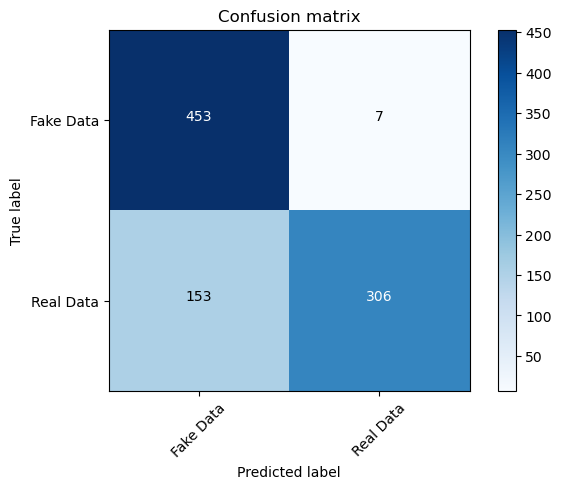

In [61]:
#accuracy score on the test data
Y_pred = MNB_model.predict(X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'])

### <font color=green> Making a Predictive Model</font>

In [62]:
X_new_MNB = X_test[3]

prediction_MNB = LR_model.predict(X_new_MNB)
print(prediction_MNB)

if (prediction_MNB[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real
